In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import sys, os
import numpy as np
import matplotlib.pyplot as plt

import importlib  #this is just for devel!

from pyHolo.beam_simulation import RichardsWolf

import warnings
# warnings.filterwarnings("ignore")

C:\Users\dmaluenda\OneDrive - Universitat de Barcelona\Research\pyHolo\pyHolo\beam_simulation


In [87]:
rw = RichardsWolf(NA=0.9995, rho_max=200)


self.theta_0/np.pi=np.float64(0.4899337381218116)
f_pix=np.float64(6.326928165587412)


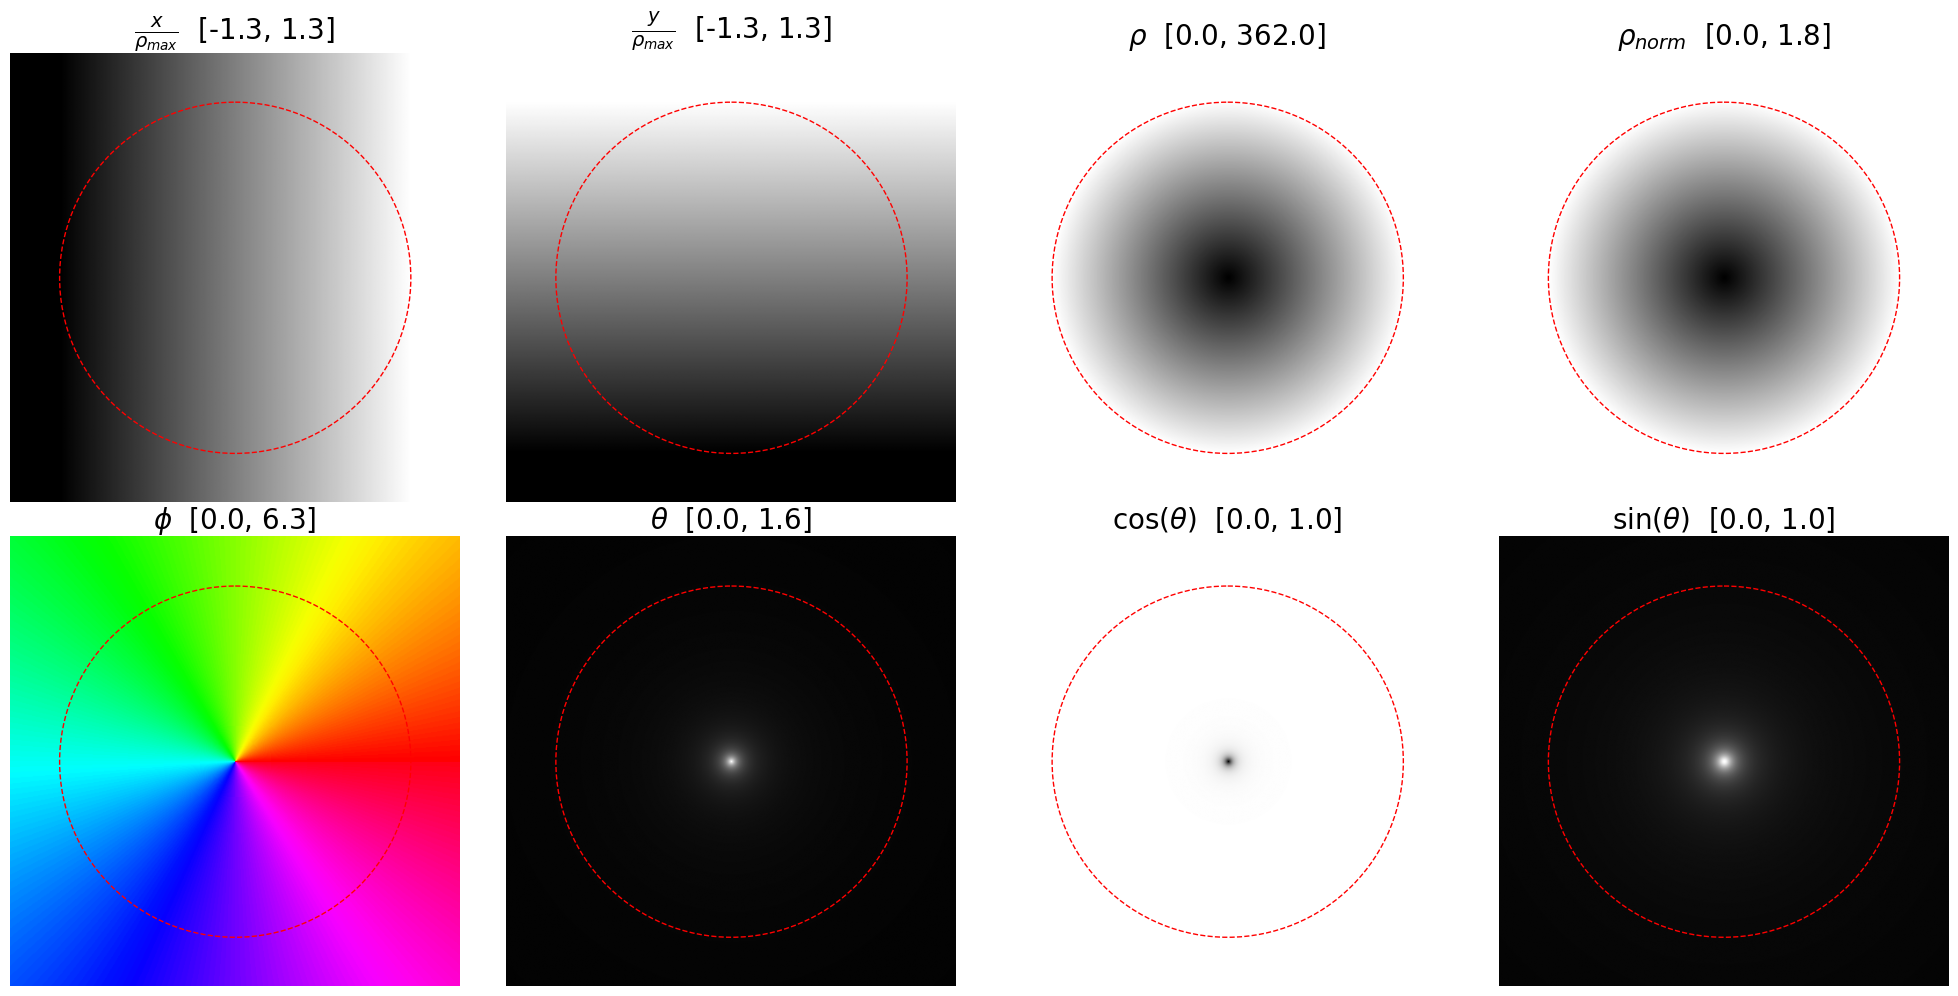

In [88]:
rw.imshow_EP()

In [18]:
plt.imshow(coord['premask'])
plt.colorbar()

(coord['sqcosth'] == np.zeros_like(coord['sqcosth'])).any()

NameError: name 'coord' is not defined

In [4]:
def my_beam():
    """ This function must return a 2D array of complex numbers with 2 channels (Ex, Ey),
        :return beam -> beam.shape=(size,size,2) beam.dtype=complex128
    """
    beam = np.zeros((resolution, resolution, 2), dtype=np.complex128)

    fill_fact = 1
    waist = coord['res_EP']

    profile = np.exp(-fill_fact**2 * coord['r2'] / waist**2)
    phase = np.zeros_like(beam[:,:,0], dtype=np.float64)
    ramp = np.repeat(np.linspace(0, np.pi, resolution//2), resolution)
    phase[:,resolution//2:] = ramp.reshape(resolution, resolution//2)
    phase[:,:resolution//2] = ramp.reshape(resolution, resolution//2)[::-1,:] + np.pi

    beam[:,:,0] = profile * np.exp(1j*phase) * coord['premask']
    beam[:,:,1] = profile * np.exp(1j*(phase+np.pi/2)) * coord['premask']

    return beam

/Users/malu/OneDrive - Universitat de Barcelona/Research/pyHolo/beam_simulation/beam_sim_utils.py:141: RuntimeWarning: invalid value encountered in true_divide
  ax[3].imshow(np.angle(Ey/Ex), vmin=-np.pi, vmax=np.pi, cmap=cmap_ph)


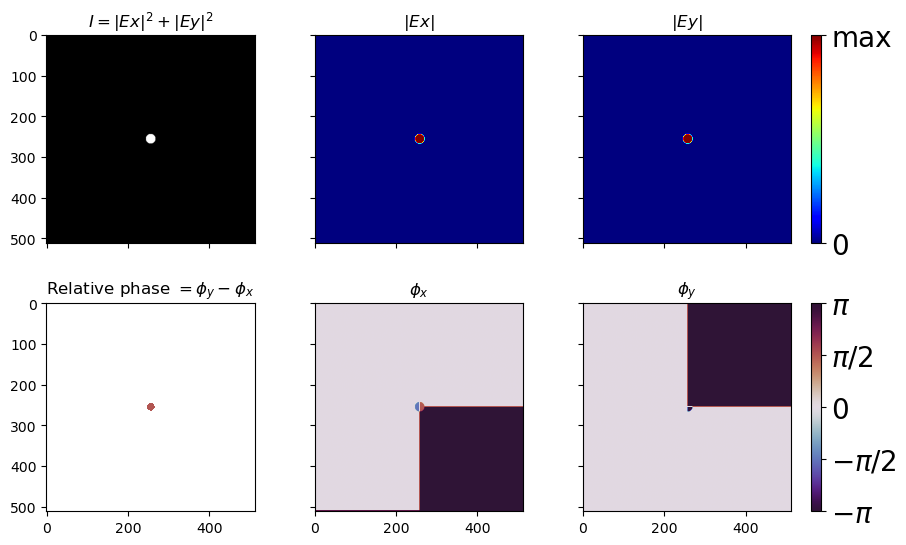

Figure 1: (My beam Pol.) The raw data of the retrieved transversal component.


1

In [5]:
importlib.reload(BS) #this is just for devel!


entrance_beam = my_beam()

BS.plot_entrance_beam(entrance_beam, label="My beam")

In [6]:
np.pi/2

1.5707963267948966

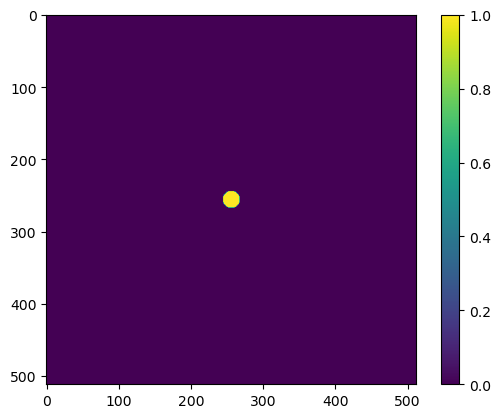

(256, 256)


<Figure size 640x480 with 0 Axes>

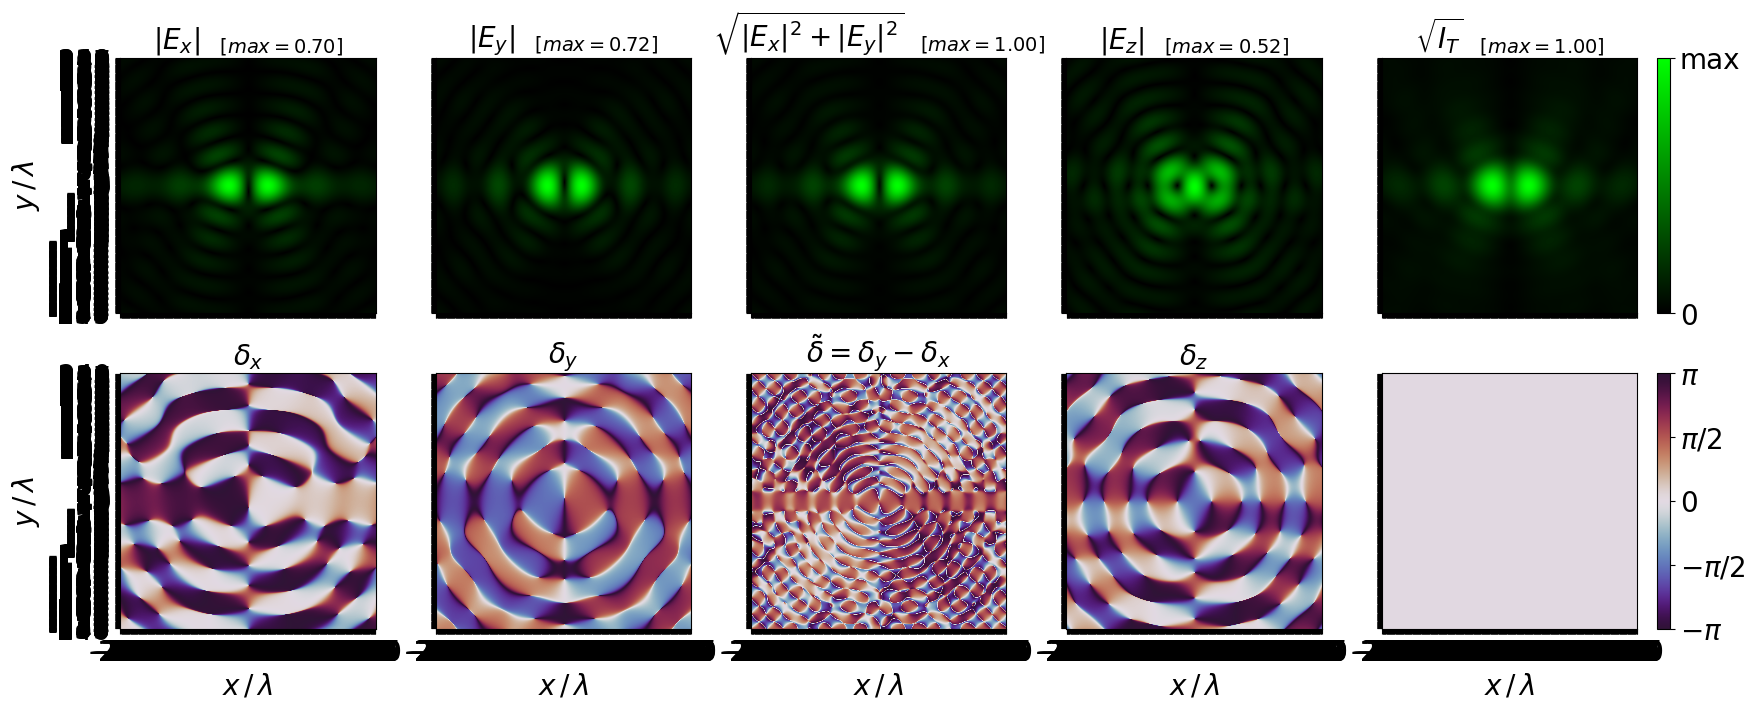

Figure 1: (My beam) Field in the focal plane.


1

In [10]:
importlib.reload(BS) #this is just for devel!

size_ratio = .5

focused_beam = BS.richards_wolf(entrance_beam, coord, NA=0.6, lamb=lamb, refractive_index=1)

trim = int(res_EP_boost / 4)

print(focused_beam[trim:-trim,trim:-trim,0].shape)

BS.plot_focused_field(focused_beam, label="My beam", lamb=lamb, trim=trim)